# Examples of Machine Learning

In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.insert(0,"../")
# our main import
import turbopanda as turb

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
turb.__version__

'0.2.3'

## Generating synthetic data

In [3]:
from scipy import stats

## Using `fit_basic`: Fitting models using Linear Regression (OLS)

Given:

- `df`: A `MetaPanda` object
- `x`: A selector or list of columns in `df`
- `y`: A string selecting the target
- `model`: A string of which sklearn object to use, or alternatively the model itself

We fit this model to the data and return:

1. `cv`: the cross-validated repeat results of test scores, train scores, fit times etc.
2. `yp`: the cross-validated predicted values for each element.
3. `coef`: the coefficients across each cross-validation.

### Random cases

In [4]:
# random 1
df_1 = pd.DataFrame(stats.norm.rvs(loc=2, scale=3, size=(100,3)), columns=['x1', 'x2', 'x3'])
df_1['y'] = stats.norm.rvs(loc=0, scale=2, size=(100,))

# random 2
df_2 = pd.DataFrame(stats.norm.rvs(loc=2, scale=3, size=(100,)), columns=['x1'])
df_2['y'] = stats.norm.rvs(loc=0, scale=2, size=(100,))

In [5]:
cv, yp = turb.ml.fit_basic(turb.MetaPanda(df_1), 'x[1-3]', 'y')
cv['test_score'].mean()

-1.8656399606328689

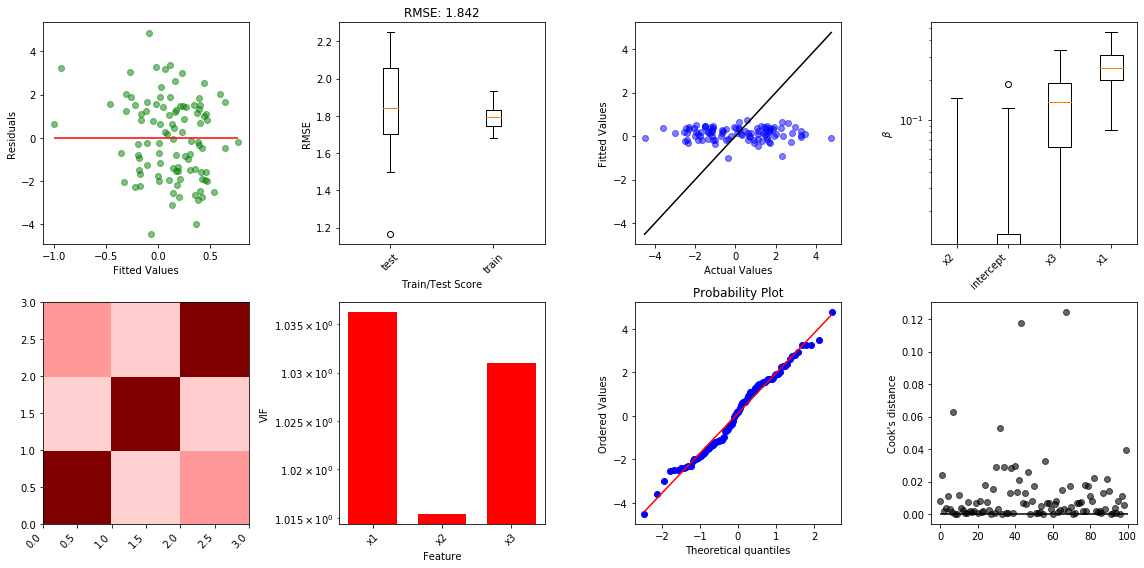

In [6]:
turb.ml.overview_plot(turb.MetaPanda(df_1), 'x[1-3]', 'y', cv, yp)

In [7]:
cv, yp = turb.ml.fit_basic(turb.MetaPanda(df_2), 'x1', 'y')
cv['test_score'].mean()

-2.031348494354094

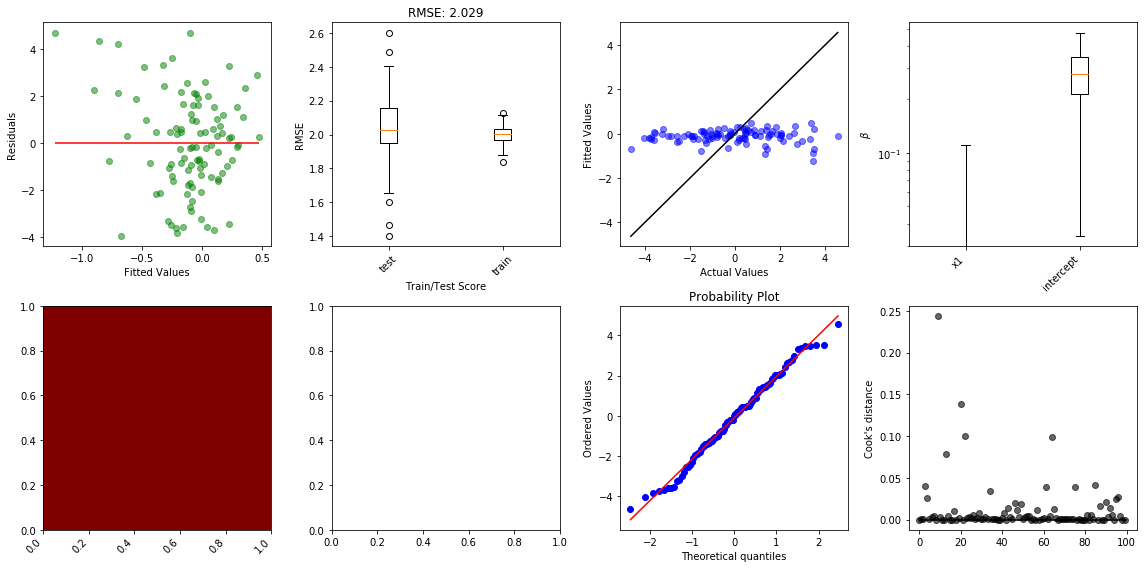

In [8]:
turb.ml.overview_plot(turb.MetaPanda(df_2), 'x1', 'y', cv, yp)

### Linear cases (with `plot=True`)

$$
y_i = \frac{1}{p} \left( \sum_j^p x_{ij} \right) + \epsilon_i
$$

In [9]:
# linear 1
df_3 = pd.DataFrame(stats.norm.rvs(loc=2, scale=3, size=(100,3)), columns=['x1', 'x2', 'x3'])
df_3['y'] = df_3.sum(axis=1) / 3. + stats.norm.rvs(loc=0, scale=.25, size=(100,), random_state=42)

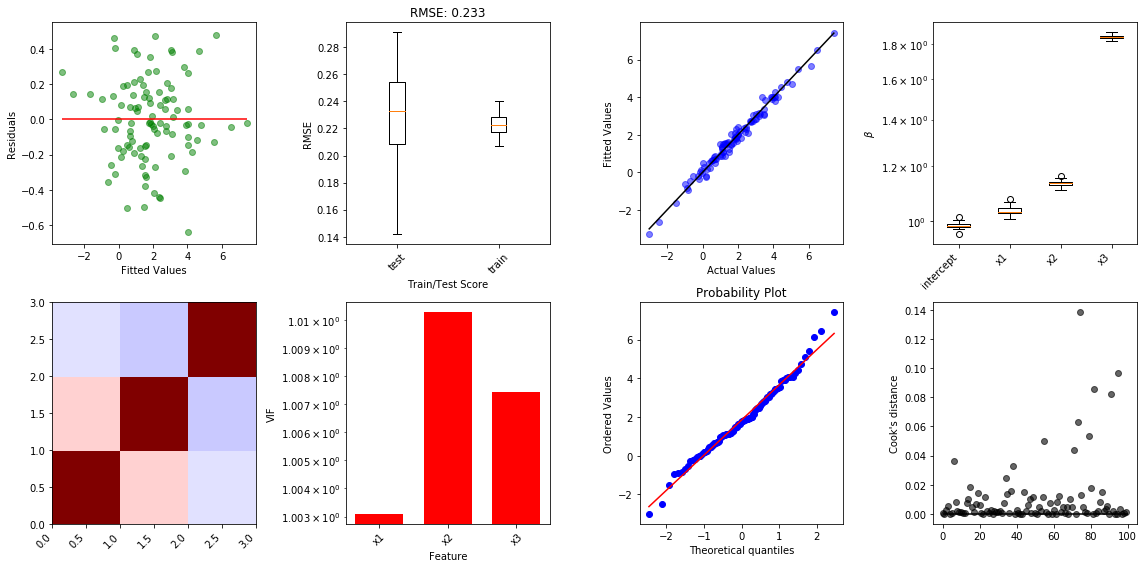

-0.23186860947323773


In [10]:
cv, yp = turb.ml.fit_basic(turb.MetaPanda(df_3), 'x[1-3]', 'y', 
                           model="LinearRegression", plot=True)
print(cv['test_score'].mean())

### Nonlinear case: $x^2$

$$
y_i = \left(\frac{1}{p} \sum_j^p x_{ij}^2 \right) + \epsilon_i \quad \forall i
$$

In [38]:
X = np.empty((100, 4))
X[:, :3] = stats.norm.rvs(loc=2, scale=3, size=(100,3))
df_4 = pd.DataFrame(X, columns=['xc1', 'xc2', 'xc3', 'xb1'])

df_4['y'] = (df_4[['xc1', 'xc2', 'xc3']].sum(axis=1).div(3)**2) + stats.norm.rvs(loc=0, scale=.25, size=(100,), random_state=42)

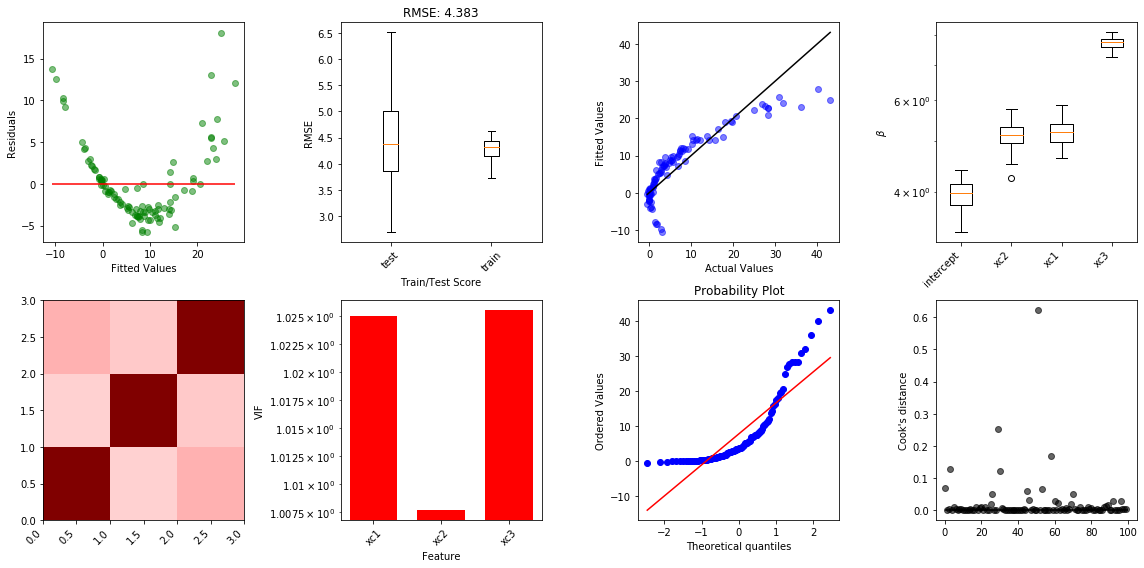

-4.521021813388013


In [39]:
cv, yp = turb.ml.fit_basic(turb.MetaPanda(df_4), 'x', 'y', 
                           model="lm", plot=True)
print(cv['test_score'].mean())

## Fitting a grid over the points

For example, we may wish to hyperparameterize $\alpha$ with a regularized linear regression model, such as Ridge or Lasso.

In the below example, by only specifying the models we wish to use, the **primary parameter** is the only one which is
iterated over using preset *default value ranges*.

For Lasso and Ridge, the primary parameter is always $\alpha$.

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 4537 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-2)]: Done 5000 out of 5000 | elapsed:    3.8s finished


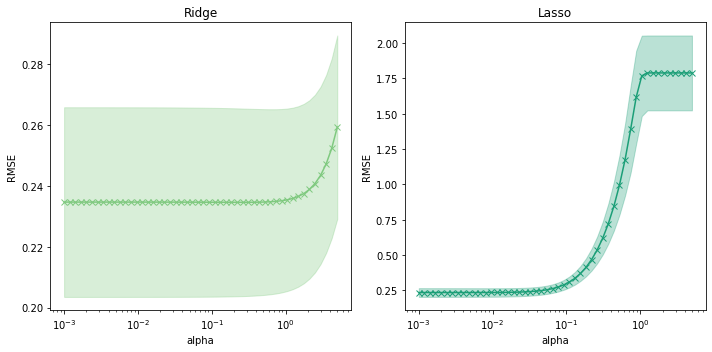

In [14]:
cv_r = turb.ml.fit_grid(turb.MetaPanda(df_3), "x[1-3]", "y", 
                        models=['Ridge', 'Lasso'], plot=True)

Below we instead specify the parameter we wish to iterate on, note here that we could specify more than one parameter.

Where there are two parameters, the secondary parameter is *split upon* into the legend, using colour.

Fitting 50 folds for each of 66 candidates, totalling 3300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 2932 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-2)]: Done 3300 out of 3300 | elapsed:    2.2s finished


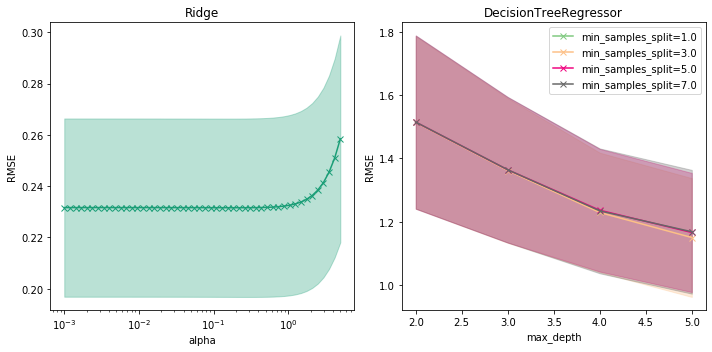

In [15]:
cv_r = turb.ml.fit_grid(turb.MetaPanda(df_3), "x[1-3]", "y", 
                        models={'Ridge': ['alpha'], 'DecisionTreeRegressor': ['max_depth', 'min_samples_split']}, 
                        plot=True)